In [4]:
from kural_core.imports import *
%reload_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)
PATH = r'D:\Code\kural_work\movie_generation\data\\'

In [2]:
file = 'as02_10m_2s_100ms_25p.tif'

In [3]:
img_ = Image.open(PATH+file)
nf = img_.n_frames
h = img_.height
w = img_.width
imgs = np.zeros((nf,h,w))
for f in range(nf):
    img_.seek(f)
    imgs[f,:,:] = np.asarray(list(img_.getdata())).reshape(h,w)

In [63]:
imgs[imgs==np.max(imgs)] = 0

In [108]:
from skimage.restoration import denoise_nl_means, estimate_sigma

In [176]:
cent[max_val]

201.5

In [197]:
imgs.dtype

dtype('float64')

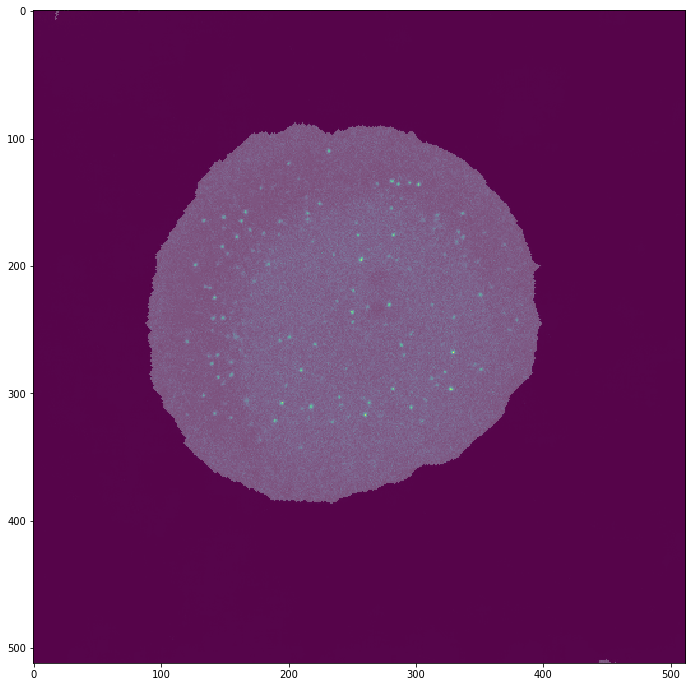

In [198]:
idx = np.random.choice(imgs.shape[0])//10
tmp_img = imgs[idx].copy()
sig = estimate_sigma(tmp_img)
dn_img = denoise_nl_means(tmp_img, sigma=sig, h=sig/2)
out, base = np.histogram(dn_img.flatten(), bins=np.linspace(0,500,501))
cent = (base[1:] + base[:-1])/2
max_val = np.argmax(out)
ddout = np.gradient(np.gradient(out))
i = max_val
found = 0
while found<10:
    if ddout[i-1]<0 and ddout[i]>0:
        found+=1
    if ddout[i-1]>0 and ddout[i]<0:
        found+=1    
    i+=1
found_zero = i
plt.imshow(dn_img)
mask = dn_img>cent[found_zero]
mask = binary_erosion(binary_dilation(mask, iterations=2), iterations=3, border_value=1)
plt.imshow(mask, cmap='YlOrRd_r', alpha=0.3)
plt.show()

In [187]:
# idx = np.random.choice(imgs.shape[0])
for idx in range(imgs.shape[0]):
    clear_output(True)
    tmp_img = imgs[idx].copy()
    sig = estimate_sigma(tmp_img)
    dn_img = denoise_nl_means(tmp_img, sigma=sig, h=sig/2)
    ax = plot_multiple([tmp_img, dn_img], show=False)
    # edges = canny(gaussian_filter(dn_img, sigma=8), sigma=16)
    for a in ax:
        for im in a.get_images():
    #         lim = im.get_clim()
            im.set_clim(0,500)
#         plt.colorbar(mappable=im, ax=a)
    # ax[1].imshow(edges, cmap='Reds_r', alpha=0.3)
    plt.show()

KeyboardInterrupt: 

(-100, 100)

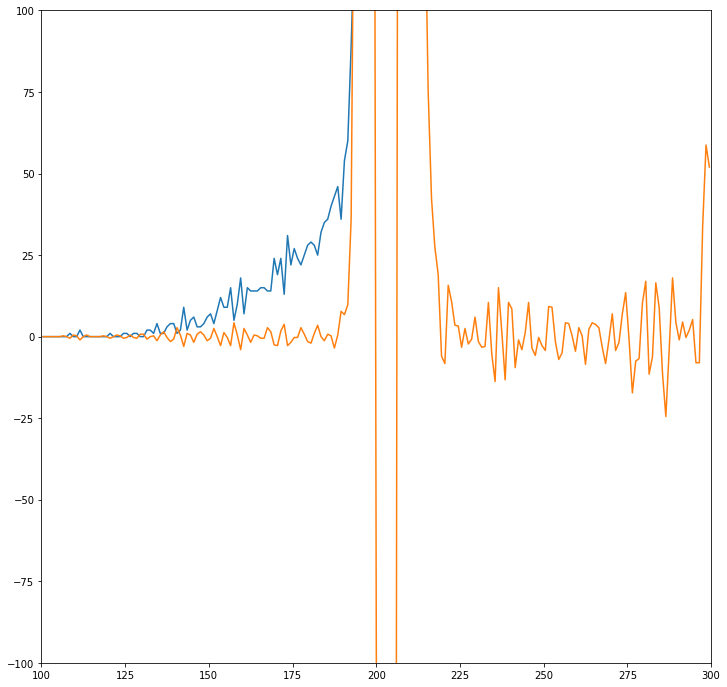

In [168]:
out, base = np.histogram(dn_img.flatten(), bins=np.linspace(100,300,201))
cent = (base[1:] + base[:-1])/2
max_val = np.argmax(out)
cout = np.cumsum(out)
plt.plot(cent,out)
ddout = np.gradient(np.gradient(out))
plt.plot(cent, ddout)
plt.xlim(100,300)
i = max_val
found = 0
while found<2:
    if ddout[i-1]<0 and ddout[i]>0:
        found+=1
    if ddout[i-1]>0 and ddout[i]<0:
        found+=1    
    i+=1
found_zero = i
plt.ylim(-100, 100)

In [169]:
cent[found_zero]

220.5

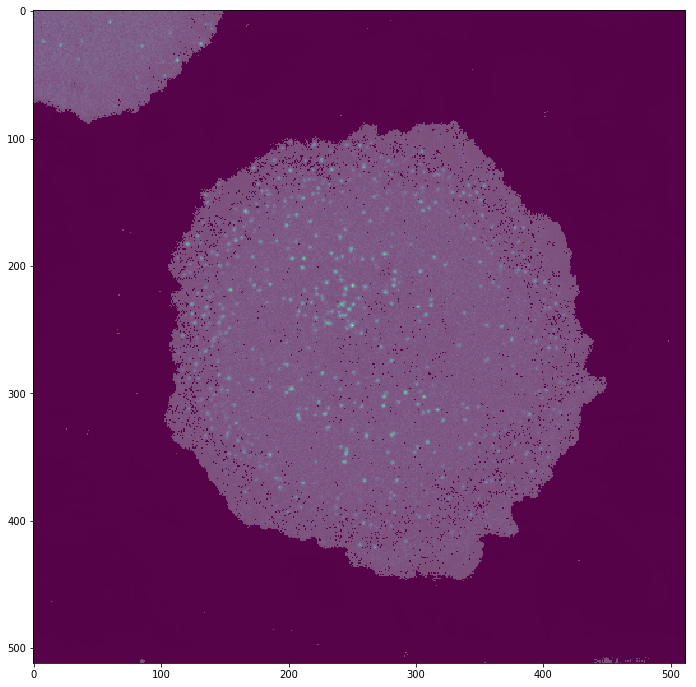

In [170]:
plt.imshow(dn_img)
plt.imshow(dn_img>cent[found_zero], cmap='YlOrRd_r', alpha=0.3)
plt.show()

In [157]:
base[found_zero]

207.20720720720723

C:\Users\joshu\Miniconda3\envs\torch_env\lib\site-packages\skimage\restoration\non_local_means.py:132: UserWarning: denoise_nl_means will default to multichannel=False in v0.15
  warn('denoise_nl_means will default to multichannel=False in v0.15')


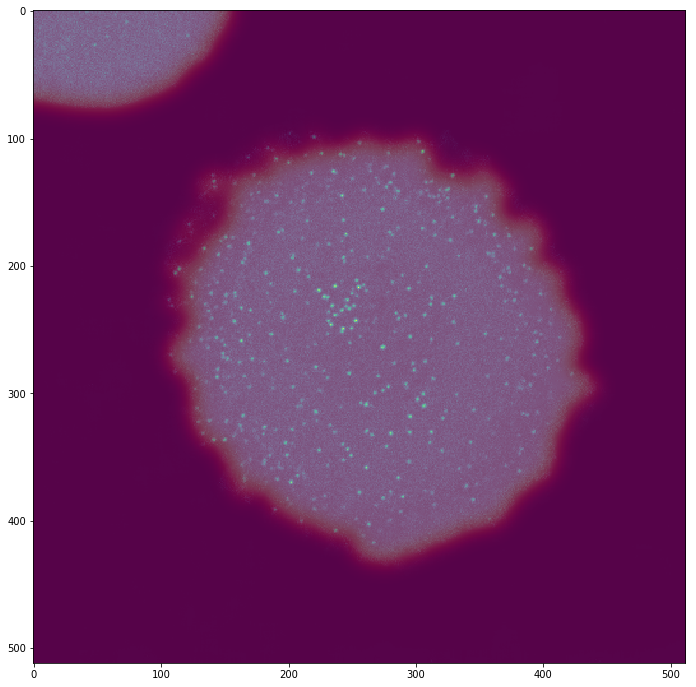

In [119]:
idx = np.random.choice(imgs.shape[0])
# idx=242
# for idx in range(imgs.shape[0]):
clear_output(True)
tmp_img = imgs[idx].copy()
sig = estimate_sigma(tmp_img)
tmp_img = denoise_nl_means(tmp_img, sigma=sig, h=sig/2)
# alpha = .05
# s2 = np.sqrt(2)
# for k in range(90):
#     diverge = convolve2d(tmp_img,np.array([[-1,-s2,-1],[-s2,4*(1+s2),-s2],[-1,-s2,-1]]),mode='same',boundary='wrap')
#     tmp_img -= (-1)**k*alpha*diverge
kmeans = MiniBatchKMeans(n_clusters=2, batch_size=10000).fit(gaussian_filter(np.log(tmp_img), sigma=2).reshape(-1,1))
ccs = (kmeans.cluster_centers_.flatten())
sort_ind = np.argsort(ccs)
ccs = ccs[sort_ind]
lut = np.zeros_like(sort_ind)
lut[sort_ind] = np.arange(kmeans.n_clusters)
labels = lut[kmeans.labels_].reshape(*tmp_img.shape)
labels = binary_erosion(binary_dilation(labels, iterations=5), iterations=6, border_value=1).astype(np.float)
labels = gaussian_filter(labels, sigma=8)
#     contours = measure.find_contours(labels, .5)
#     long = max(enumerate([len(c) for c in contours]), key=lambda x:x[1])[0]
#     ax = plot_multiple([labels,imgs[idx,:,:]], show=False)
plt.figure(figsize=(12,12))
plt.imshow(tmp_img)
plt.imshow(labels, cmap='YlOrRd_r', alpha=0.3)

#     for a in ax:
#         a.plot(contours[long][:, 1], contours[long][:, 0], 'r', linewidth=2)
# plt.colorbar()
plt.show()
#     time.sleep(1/20)

In [44]:
idx

242

In [138]:
ccs = np.zeros((nf,2))
labels = np.zeros((nf,h,w))
for f in range(nf):
    kmeans = MiniBatchKMeans(n_clusters=2, batch_size=10000).fit(imgs[f,:,:].reshape(-1,1))
    cc = kmeans.cluster_centers_.flatten()
    sort_ind = np.argsort(cc)
    ccs[f,:] = cc[sort_ind]
    label = kmeans.labels_
    label = np.logical_xor(label,sort_ind[0]).reshape(h,w)
    label = binary_erosion(binary_dilation(label, iterations=5), iterations=6, border_value=1).astype(np.float)
    labels[f,:,:] = gaussian_filter(label, sigma=16)
    if f%10==9:
        print(f)

9
19
29
39
49
59
69
79
89
99
109
119
129
139
149
159
169
179
189
199
209
219
229
239
249
259
269
279
289
299


In [145]:
imgs = torch.tensor(imgs.astype(np.float))
labels = torch.tensor(labels)

AttributeError: 'Tensor' object has no attribute 'astype'

In [147]:
imgs = imgs.to(torch.float32)

In [151]:
labels = labels.to(torch.float32)

In [140]:
with open(PATH+'tmp_imgs_labels_ccs.pickle', 'wb') as f:
    pickle.dump((imgs, labels, ccs), f, protocol=4)

In [22]:
with open(PATH+'tmp_imgs_labels_ccs.pickle', 'rb') as f:
    imgs, labels, ccs = pickle.load(f)

In [23]:
ds = CellMaskUNetDataset(imgs, labels, ccs)
train_idx, val_idx = RandomIndicesForKFoldValidation(len(ds), 0, K=5, rand_seed=42, nORp=1)
bs = 10
clip = 50
train_dl = torch.utils.data.DataLoader(ds, batch_size=bs, sampler=SubsetSampler(train_idx, shuffle=True))
val_dl = torch.utils.data.DataLoader(ds, batch_size=2*bs, sampler=SubsetSampler(val_idx))
model = CellMaskUNetModel().cuda()
opt = torch.optim.Adam(model.parameters())
train_loss = []
val_loss = []
criterion = nn.MSELoss()

In [153]:
model, _tl, _vl = train_model(model, train_dl, val_dl, opt, criterion, lr_start=1e-3, lr_end=1, epochs=100, cycles=1, lr_cycle='sin')
train_loss += _tl
val_loss += _vl

><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><
Spent 33m 12s doing 100 total steps for an average of 19.9s per step.
><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><


In [26]:
torch.save(model.state_dict(), PATH + 'tmp_cell_mask_model.pth')

In [24]:
model.load_state_dict(torch.load(PATH + 'tmp_cell_mask_model.pth'))

RuntimeError: Error(s) in loading state_dict for CellMaskUNetModel:
	Missing key(s) in state_dict: "out.conv.1.conv.0.weight", "out.conv.1.conv.0.bias", "out.conv.1.conv.2.weight", "out.conv.1.conv.2.bias", "out.conv.2.conv.0.weight", "out.conv.2.conv.0.bias", "out.conv.2.conv.2.weight", "out.conv.2.conv.2.bias", "out.conv.3.weight", "out.conv.3.bias". 
	Unexpected key(s) in state_dict: "out.conv.1.weight", "out.conv.1.bias". 

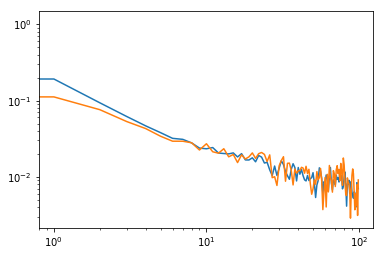

In [154]:
x = list(range(len(train_loss)))
# x = lr_range
slc = slice(0,len(train_loss))
plt.plot(x[slc],train_loss[slc])
plt.plot(x[slc],val_loss[slc])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
def norm(x):
    return (x-x.mean())/x.std()

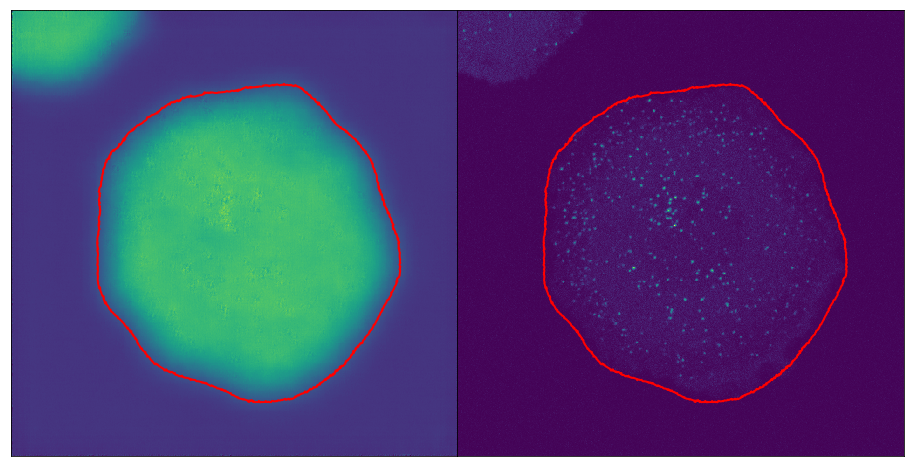

In [171]:
idx = np.random.choice(len(ds))
img = imgs[idx][None,None]
out = model(norm(img.cuda())).data.cpu()
ax = plot_multiple([out[0,0], img[0,0]], show=False)
contours = measure.find_contours(out[0,0].numpy(), 0.2)
long = max(enumerate([len(c) for c in contours]), key=lambda x:x[1])[0]
ax[0].plot(contours[long][:, 1], contours[long][:, 0], 'r', linewidth=2)
ax[1].plot(contours[long][:, 1], contours[long][:, 0], 'r', linewidth=2)
plt.show()

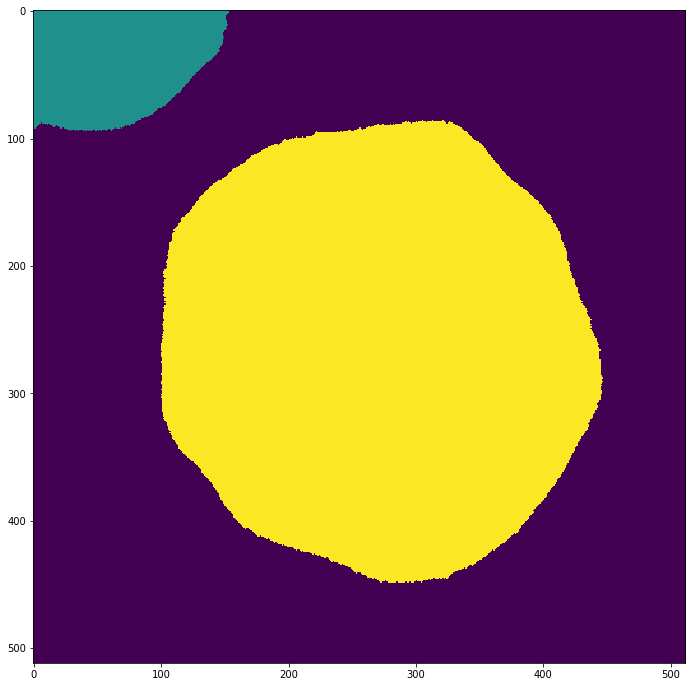

In [172]:
mask = out[0,0].numpy()>0.2
mask = binary_erosion(binary_dilation(mask,iterations=5), iterations=6, border_value=1).astype(np.int)
blobs = measure.label(mask,background=0)
nb = np.max(blobs)
count = np.zeros(nb)
for i in range(nb):
    count[i]=np.sum(blobs==i)

plt.figure(figsize=(12,12))
# plt.hist(count, bins = np.linspace(0,np.max(count),100))
plt.imshow(blobs)
plt.show()

In [58]:
mask = out[0,0].numpy()>0.1
mask_start = mask
equal = False
count = 0
while not equal:
    mask_end = binary_dilation(binary_erosion(mask, iterations=5), iterations=6).astype(np.int)
    equal = np.all(mask_start==mask_end)
    mask_start = mask_end
    count += 1
    print(count)

1
2


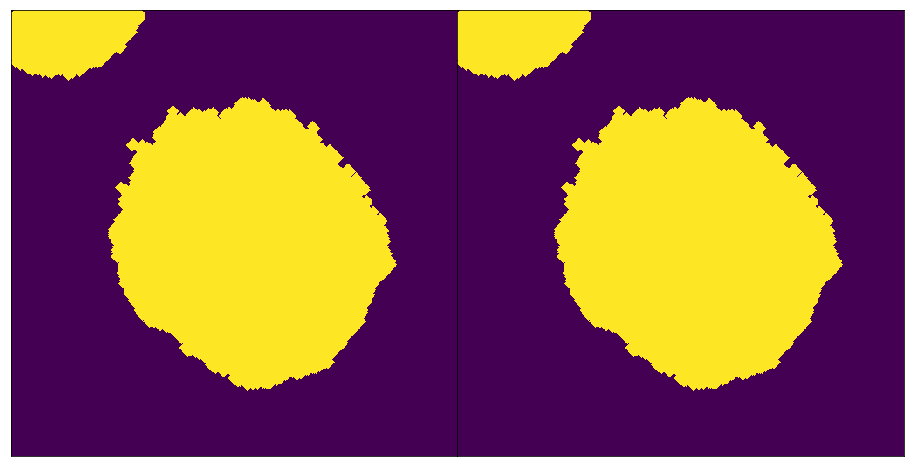

In [59]:
plot_multiple([mask_start, mask_end])

In [18]:
scount = np.sort(count)

In [19]:
np.diff(scount)

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 1.0353e+04, 8.6579e+04, 5.7848e+04])

In [41]:
tmp = out[0,0].numpy()

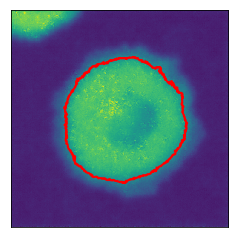

In [51]:
from skimage import measure

contours = measure.find_contours(tmp, 0.5)

# Display the image and plot all contours found
plt.imshow(tmp)

long = max(enumerate([len(c) for c in contours]), key=lambda x:x[1])[0]
plt.plot(contours[long][:, 1], contours[long][:, 0], 'r', linewidth=2)

plt.axis('image')
plt.xticks([])
plt.yticks([])
plt.show()

In [47]:
max(enumerate([len(c) for c in contours]), key=lambda x:x[1])
    

(31, 2113)

In [29]:
ret, tmp = cv2.threshold(tmp, 127, 255, cv2.THRESH_BINARY)

In [38]:
im2, contours, _ = cv2.findContours(tmp, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [39]:
cont = cv2.drawContours(im2, contours, 1, [0, 255, 0])

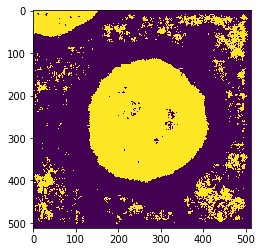

In [40]:
plt.imshow(cont)